In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import pandas as pd
import seaborn as sns
import scipy

from sklearn.cluster import AgglomerativeClustering
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Clustering Analysis Project

*Author: Antonina Anastasova*

---

## Table of Contents

- [Introduction to Clustering Analysis](#introduction-to-clustering-analysis)
    - [Definition of clusters and their relevance in real-world data](#definition)
    - [Overview of clustering analysis and unsupervised learning](#overview)
    - [Examples of 2D clustering analysis](#)

- [Clustering Algorithms: An Overview](#clustering-algorithms-an-overview)
    - [Explanation of how clusters are defined in clustering algorithms](#)
    - [Different distance metrics](#)
    - [Brief introduction to popular clustering algorithms (k-means, agglomerative clustering)](#)

- [K-means Clustering](#k-means-clustering)
    - [Detailed explanation of k-means clustering algorithm](#)
    - [Understanding convergence in k-means and its dependency on initialization](#)
   
- [K-means Implentation](#)
    - [Implementing k-means clustering algorithm (code)](#)
    - [K-means results using the Euclidean distance metric](#)
    - [K-means results using different distance metrics](#)

- [Agglomerative Clustering](#agglomerative-clustering)
    - [Introduction to agglomerative clustering algorithm](#)

- [Agglomerative Clustering Implementation](#agglomerative-clustering-impleme)
    - [Dendogram]
    - Introduction to agglomerative clustering algorithm
    - Explaining the concept of hierarchical clustering and dendrograms
    - Implementing agglomerative clustering algorithm (code example or using a ready-made implementation)
    - Visualizing agglomerative clustering results using the Euclidean distance metric

- [Real-World Application of Clustering Analysis](#real-world-application-of-clustering-analysis)
    - [Introduction to a real-world scenario/application]
    - [Applying clustering analysis to the chosen application]

- [Conclusion and Summary](#conclusion-and-summary)
    - Recap of the key concepts covered in the project
    - Summary of the findings and insights from the clustering analysis
    - Discussion on the importance of appropriate distance measure selection

---

## Introduction to Clustering Analysis


### Definition of a cluster

In Statistical Analysis, a cluster is a group of data points formed based on shared criteria or features, indicating their similarity. Natural groupings in the data occurs are often objects or entities demonstrate alike distinctive features.
Some widely recognized examples include identifying similarities in individuals' purchasing behavior or uncovering shared characteristics among different species.

### Overview of Clustering Analysis

Clustering Analysis in a technique from unsupervised learning, in a dateset different clustering algorithms identify patterns in a datasetand group them int clusters. Unsupervised learning works with unlabeled data, meaning data is not put in predefined categories. The goal when performing usupervised learning is to uncover relationships in your data without prior knowledge. <br>

Unsupervised learning refers to a category of machine learning tasks where the objective is to find patterns or structures in unlabeled data without explicit guidance from a predefined target. It encompasses various techniques beyond clustering, such as dimensionality reduction, density estimation, and generative modeling. Unsupervised learning algorithms can extract valuable insights from data, unveiling patterns, and transforming the data into a more comprehensible representation for advanced analysis and informed decision-making. <br>

In clustering analysis, the algorithm segregates the data into clusters based on the evaluation of distances or proximities between data points. The objective is to optimize the arrangement of clusters such that the within-cluster similarity, as measured by distances or proximity metrics, is maximized, while the between-cluster similarity is minimized. This can lead to facilitating the identification of distinctive patterns and natural groupings within the dataset.



### Examples of 2D clustering analysis

**Customer Segmentation** <br>

Take for example a dataset of customers from an e-commerce platform. Each data point represents a customer and has two features: the average purchase amount and the average time spent on the platform. In this example, you can plot the customer dataset on a scatter plot where the x-axis represents the average purchase amount, and the y-axis represents the average time spent on the platform By clustering the customers, you can identify different customer segments, such as high-value customers, occasional shoppers, or loyal customers. Further, you can assign different colors to the points based on the identified customer clusters.

**Image Compression** 

To compress an RGB image using clustering in 2D, we flatten the RGB image into a 2D array where each pixel is represented by its red, green, and blue values. Next, we apply K-means clustering to group similar pixels together based on their RGB values. Each cluster represents a distinct color. We replace each pixel in the original image with the RGB values of the cluster centroid it belongs to. This reduces the number of colors used in the image and achieves compression while preserving some visual characteristics.

**Flower Clustering Analysis in 2D**

In this example, we have a dataset of flowers with two features: sepal length and sepal width. By applying clustering analysis, such as K-means, we can group similar flowers based on these dimensions. The resulting scatter plot with clustered data points helps visualize natural groupings of flowers based on their sepal characteristics. This analysis aids in understanding species variations and can assist in flower classification or identification tasks.

## Clustering Algorithms: An Overview

### How are clusters defined?

In clustering algorithms, clusters are formed by utilizing mathematical measures of similarity or proximity between data points.

Some different ways of defing clusters:

**Distance-based methods**: Clusters are defined based on the distance or similarity between data points. The most common approach is to use distance measures such as Euclidean distance, Manhattan distance, or cosine similarity. Data points that are close to each other are assigned to the same cluster.

**Density-based methods**: Clusters are defined based on the density of data points. Density-based clustering algorithms, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise), identify regions of high data point density as clusters. Data points that are sufficiently close and have a minimum number of neighbors are considered part of a cluster.

**Partitioning methods**: Clusters are defined by partitioning the data into distinct groups. Partitioning algorithms, such as K-means, divide the data into a predefined number of clusters by minimizing an objective function, for example the sum of squared distances or variance within each cluster.

**Hierarchical methods**: Clusters are defined hierarchically, forming a tree-like structure. Hierarchical clustering algorithms build a hierarchy of clusters by successively merging or dividing clusters based on similarity or distance measures. This allows for exploring clusters at different levels of granularity.

**Model-based methods**: Clusters are defined based on statistical models that describe the data distribution. Model-based clustering algorithms, such as Gaussian Mixture Models (GMM), fit probability distributions to the data and assign data points to clusters based on their likelihood of belonging to each distribution.


### Different Distance metrics

#### Euclidean distance

$d(p,q)=\sqrt {\sum_{i=1}^{n}(q_i-p_i)^2}$, where $p,q$ are two points in Euclidean $n$-dimensional space.
    
In 2D where $p=(p_1,p_2)$ and $q=(q_1,q_2)$ $\implies d(p,q)=\sqrt {\sum_{i=1}^{2}(q_i-p_i)^2}$.
   

In [2]:
# Euclidean distance function 

def euclidean_distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

#### Manhattan distance

$d(p,q)=|p_1-q_1|+|p_2-q_2|+ \dots+|p_n-q_n| = \sum_{i=1}^{n}|p_i-q_i|$, where $p_1,p_2,\dots,p_n$ and $q_1,q_2,\dots,q_n$ are the coordinates of the points $p,q$ in a n-dimensional space. 

In [3]:
# Function for the Manhattan distance 

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

#### Chebyshev distance

In [4]:
def chebyshev_distance(x, y):
    return np.max(np.abs(x - y))

#### Custom distance

In [5]:
def euclidean_distance_weighted(x, y, weights=None):
    if weights is None:
        weights = np.ones_like(x)  # Use equal weights if not provided
    else:
        weights = np.array(weights)
        
    squared_diff = (x - y) ** 2 * weights
    sum_squared_diff = np.sum(squared_diff)
    euclidean_distance = np.sqrt(sum_squared_diff)
    
    return euclidean_distance

### Brief introduction to popular clustering algorithms

#### K-means Algorithm

The K-means algorithm is a popular clustering algorithm used to partition a dataset into K distinct clusters. It follows an iterative process to find optimal cluster centroids. Initially, K centroids are randomly selected. Each data point is then assigned to the nearest centroid based on the distance, most commonly the Euclidean distance. The centroids are updated by calculating the mean of the assigned data points for each cluster. This assignment and update process is repeated until convergence, where the cluster assignments no longer change significantly. In other words, the algorithm aims to find cluster centroids that  minimize the sum of squared distances between data points and their assigned centroids. However, it may converge to a local optimum (the best solution within a particular region), so running the algorithm multiple times with different initializations is often done to find the best solution. K-means provides an efficient and effective way to discover meaningful clusters in data based on their distances to centroids.

#### Agglomerative Algorithm

Agglomerative clustering is a hierarchical clustering, in other words tree-like structure algorithm that starts with each data point as a singleton cluster and iteratively merges the closest pairs of clusters, typically based on the minimum distance between cluster elements. It continues this process until a stopping criterion is met, usually given number of clusters or distance threshold. It does not require specifying the number of clusters in advance and allows for clustering at different levels of granularity.

## K-means Clustering

### Detailed Mathematical explanation

K-means is an unsupervised clustering algorithm which results is K number of centroids and the data points classified to the clusters. In the picture below grey circles are the cluster centroids, the center points of each cluster. 
![Alt Text](https://muthu.co/wp-content/uploads/2018/07/Snip20180707_105.png) [ref]

Steps of the algorithm:

Let's have input data points $x_1,x_2,x_3,\dots,x_n$ and value of $K$ (the number of clusters). Below we denote any distance with $||.||$. We have the follwing steps:

1. Pick $K$ points as the initial centroids from the dataset, either randomly or the first K.
2. Find the distance of each point in the dataset with the identified $K$ points (cluster centroids).
3. Assign each data point to the closest centroid using the distance found in the previous step. Meaning say $w_{ik}=1$ if for data point $x_i$ it belongs to cluster $k$ and $\mu_k$ will be the centroid of the cluster which $x_i$ belongs to t, where $k=1,\dots,n$. In mathematical terms:

    $w_{ik}=\begin{cases}
            1, & \text{if} \ k = argmin_j||x_i-\mu_j||^2\\
            0,              & \text{else}
          \end{cases}$.

    
4. Find the new centroid by taking the average of the points in each cluster group. $\mu_k$ is the mean of the data assigned to the cluster $C_k$: 

    $\mu_k=\frac{1}{|X|_k}\sum_{x_i \in C_k}x_i$. <br>
    
    
5. Repeat previous steps for a fixed number of iteration or with a stoping criterion- the centroids don’t change significantly.

To summarize, the k-means algorithms aims to minimize the objective function, the within-cluster sum of squares (the within-cluster variance). <br>
    $ J= \sum_{i=1}^{n} \sum_{k=1}^{K} w_{ik}||x_i-\mu_k||^2$.
    
The convergence of the k-means algorithm due to the monotonic decrease of the objective function and the limited movement of the cluster centroid. 

With each iteration, the algorithm aims to minimize the within-cluster variance. At each step, the assignment of data points to the nearest centroid and the recalculation of centroids result in a decrease of the onjective function. Since the within-cluster sum of squares is a non-negative value, it can only decrease or remain the same.

Further, as the algorithm progresses, the positions of the centroids are updated based on the mean of the data points assigned to each cluster. With each iteration, the centroids move closer to the center of their respective clusters. Eventually, the centroids stabilize and reach a point where the movement becomes negligible, indicating convergence.


### Convergence

The dependency on initialization in k-means can have a significant effect on the resulting clusters. Different initializations can lead to different cluster assignments and potentially different local optima. The dependency on initialization arises from the random initial position of the centroids. The initial positions of the centroids are typically randomly chosen from the data points. Since k-means is an iterative algorithm, the initial positions can influence the convergence path and the final clusters obtained. Moreover, the algorithm is sensitive to outliers. Another factor contributing to the dependency on initialization is the sensitivity of k-means to outliers. Outliers are data points that deviate significantly from the majority of the data. If an outlier is assigned as an initial centroid or is close to an initial centroid, it can attract a large number of data points, potentially leading to suboptimal clusters.

Techniques to reduce the dependence:

- Multiple Runs with Random Initialization: Running the k-means algorithm multiple times with different random initializations can help mitigate the impact of initialization. By exploring various convergence paths, this approach increases the chances of finding a good solution. The final clusters can be selected based on the run with the lowest within-cluster sum of squares (WCSS) among all the runs.

- K-means++ Initialization: Instead of randomly selecting the initial centroids, the k-means++ initialization method can be used. K-means++ chooses the initial centroids in a way that promotes a more even distribution across the data points. By reducing the likelihood of selecting suboptimal initial positions, k-means++ improves the convergence towards better clustering solutions.

- Deterministic Initialization: Rather than relying on random initialization, you can set the initial centroids based on domain knowledge or a pre-processing step. For instance, you could use a clustering algorithm like hierarchical clustering to identify initial centroids or select them based on prior information about the data distribution. Deterministic initialization provides more control over the starting positions of the centroids.

- Post-processing and Refinement: After running the k-means algorithm, you can apply post-processing techniques to refine the obtained clusters. Outlier detection and removal methods can help handle potential outliers that may affect the clustering results. Additionally, techniques like cluster merging or splitting can be employed to further improve the clustering configuration

## K-means implementation


Custom implementation. Specify a distance metrics from one of the functions above.

In [6]:
def kmeans(X, n_clusters, distance_metric, max_iterations=100, weights=None):
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], size=n_clusters, replace=False)]
    
    
    if (distance_metric != euclidean_distance_weighted):
        for i in range(max_iterations):
            # Assign each sample to the nearest centroid
            distances = np.array([[distance_metric(x, centroid) for centroid in centroids] for x in X])

            labels = np.argmin(distances, axis=1)

            # Update centroids by computing the mean of assigned samples
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])

            # Check if centroids have converged
            if np.allclose(centroids, new_centroids): # np.allclose is used to determine if the updated centroids in the k-means algorithm have converged by comparing them with the previous centroids
                break

            centroids = new_centroids
    else:
        for i in range(max_iterations):
            
            # Calculate distances using the custom distance metric
            distances = np.array([[distance_metric(x, centroid, weights) for centroid in centroids] for x in X])

            labels = np.argmin(distances, axis=1)

            # Update centroids by computing the mean of assigned samples
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])

            # Check if centroids have converged
            if np.allclose(centroids, new_centroids):
                break

        centroids = new_centroids
        
    
    return labels, centroids

### The elbow method

For each value of k in the range from 1 to 10 below we compute within-cluster sum of squares. Clearly, WCSS will be largest for k=1, we are looking for the optimal value of k. In the elbow method we pick the point where the graph resembles an elbow this is the point where a significant change in the wcss, also called distortion is found. This method provides a good balance for choosing an optimal number of clusters capturing the data structure without excessive fragmentation.

Function for the elbow method to use in our project.

In [7]:
def kmeans_clustering_elbow_method(processed_features, distance_metric, max_clusters=10, weights_distance=None):
    wcss = []  # Within-cluster sum of squares
    
    
    if distance_metric != euclidean_distance_weighted:
        for n_clusters in range(1, max_clusters + 1):
            labels, centroids = kmeans(processed_features, n_clusters, distance_metric=distance_metric)
            distortion = np.sum([distance_metric(processed_features[i], centroids[labels[i]]) ** 2 for i in range(processed_features.shape[0])])
            wcss.append(distortion)
    else:
        for n_clusters in range(1, max_clusters + 1):
            labels, centroids = kmeans(processed_features, n_clusters, distance_metric=distance_metric, weights=weights_distance)
            distortion = np.sum([distance_metric(processed_features[i], centroids[labels[i]], weights=weights_distance) ** 2 for i in range(processed_features.shape[0])])
            wcss.append(distortion)
    

    # Plot the elbow curve
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    # Set x-axis ticks to integer values
    plt.xticks(range(1, max_clusters + 1))
    
    plt.show()


### Silhouette score

The silhouette score is a measure of how similar a data point is within-cluster compared to other clusters. The Silhouette score can be easily calculated in Python using the metrics module of the scikit-learn/sklearn library.

We select a range of values of k (say 1 to 10) and plot Silhouette coefﬁcient for each value of K. The equation for calculating the silhouette coefﬁcient for a particular data point: $S(i)=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}$. Here:
- $S(i)$ is the silhouette coefficient of the data point $i$.
- $a(i)$ is the average distance between $i$ and all the other data points in the cluster to which $i$ belongs.
- $b(i)$ is the average distance from $i$ to all clusters to which $i$ does not belong. [ref]

The silhouette score takes values between [-1,1]. Noticeably, 1 meaning the data point $i$ is very compact within the cluster, analogically -1 indicated far away from the cluster. 0 denotes overlapping clusters.

Below we will use the ready-made silhouette function from `sklearn.metrics`. The graph plot for the silhoette analysis is the mean of the $S(i)$ for every k vs. the values of k. 


**Function for the silhouette score**

In [8]:
def perform_silhouette_analysis(X, distance_metric, max_clusters = 5):

    # Perform k-means clustering for different values of k
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        labels, centroids = kmeans(X, n_clusters, distance_metric)
        silhouette_scores.append(silhouette_score(X, labels, metric = distance_metric)) # silhouette score from sklearn.metrics

    # Plotting the silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker = 'o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')

    plt.show()


#### The Iris dataset

Get the famous *iris dataset* from sklearn.datasets to thouroughly investigate the clustering algorithms in question. We have information that there are 3 types of iris species and thb

In [9]:
# Load the iris dataset
iris = load_iris()

# Access the features and target variables
X = iris.data  # Features
y = iris.target  # Target variable (species) 3 types of iris species

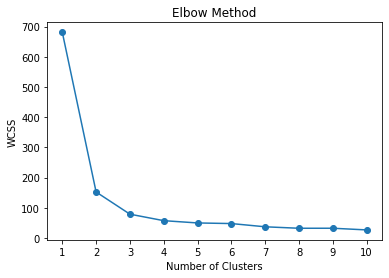

In [10]:
# Determine the optimal number of clusters using the elbow method with Euclidean distance for the iris dataset

kmeans_clustering_elbow_method(X, distance_metric = euclidean_distance)

We observe elbow-like shape at k=2 and k=3. Let's consider k=3.

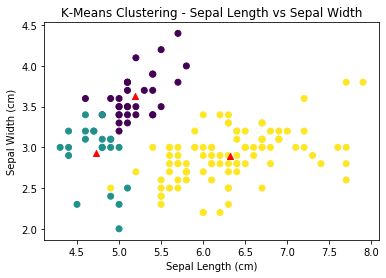

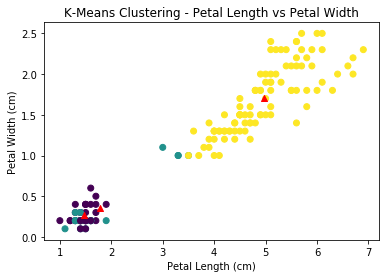

In [11]:
# Set the optimal number of clusters to 3
n_clusters = 3

# Perform k-means clustering
labels, centroids = kmeans(X, n_clusters, distance_metric=euclidean_distance)

# Plot the data points with their assigned clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering - Sepal Length vs Sepal Width')
plt.show()

plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='^', c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering - Petal Length vs Petal Width')
plt.show()

### Scatter plot

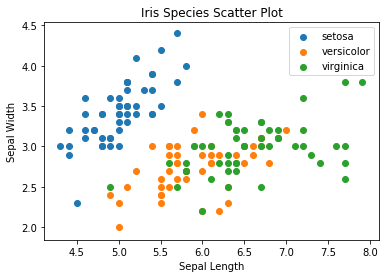

In [12]:

# Create a scatter plot for each species
for species in range(3):
    # Get the indices of samples belonging to the current species
    indices = y == species
    
    # Plot the samples with a different color and label for each species
    plt.scatter(X[indices, 0], X[indices, 1], label=iris.target_names[species])

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Species Scatter Plot')

# Add legend
plt.legend()

# Show the plot
plt.show()


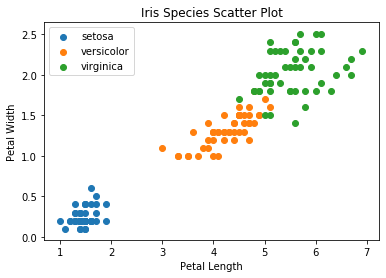

In [13]:
# Create a scatter plot for each species

for species in range(3):
    # Get the indices of samples belonging to the current species
    indices = y == species
    
    # Plot the samples with a different color and label for each species
    plt.scatter(X[indices, 2], X[indices, 3], label=iris.target_names[species])

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Species Scatter Plot')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### Trying the elbow method with the manhattan distance

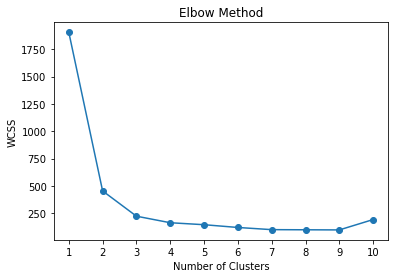

In [14]:
# Determine the optimal number of clusters using the elbow method with Manhattan distance

kmeans_clustering_elbow_method(X, distance_metric = manhattan_distance)

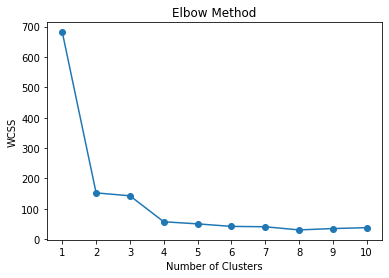

In [15]:
kmeans_clustering_elbow_method(X, distance_metric = euclidean_distance)

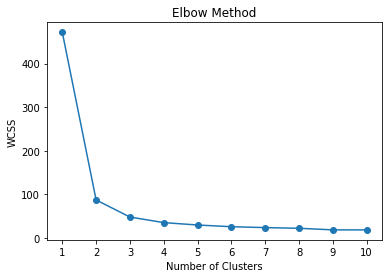

In [16]:
kmeans_clustering_elbow_method(X, distance_metric = chebyshev_distance)

## Agglomerative Clustering

Let's say we have $n$ data points in the dataset. $X = {x_1, x_2, \dots, x_n}$ is a set of $n$ data points, where $x_i$ represents the feature vector of the $i$-th data point. 

$C_0 = {{x_1}, {x_2}, ..., {x_n}}$ is the initial set of $n$ clusters, where each cluster contains a single data point. 
Further, D is the distance matrix as follows:
$$
D = \begin{bmatrix}
D_{11} & D_{12} & \dots & D_{1n} \\
D_{21} & D_{22} & \dots & D_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
D_{n1} & D_{n2} & \dots & D_{nn} \\
\end{bmatrix}
\ \text{, where $D_{ij}$ is the distance between cluster $i$ and $j$.}$$

We denote the desired number of clusters with k.

Now the algorithm is executed as follows:

1. Start with $n$ individual clusters. $C_0 = {{x_1}, {x_2}, ..., {x_n}}$.
2. Until we reach the desired number of clusters the following operation is executed:

   - Compute the pairwise distance $D_{ij}$ between each pair of clusters using a distance metric.The distance metric could be Euclidean distance, Manhattan distance, cosine similarity, etc.
   - Find the pair of clusters with the minimum distance according to a chosen linkage criterion. Let's consider the complete  linkage criterion as an example. The distance between clusters $i$ and $j$ is defined as the maximum distance between any two points in the clusters: $D_{ij} = max\{d(x_i, x_j)\}$ for $x_i \in C_i, x_j \in C_j$, where $d(x_i, x_j)$ is the distance between two individual data points $x_i$ and $x_j$, and $C_i$ and $C_j$ represent the sets of data points in clusters i and j, respectively.
   - 
  Merge the two clusters with the minimum distance into a new cluster. Let's denote the newly formed cluster as $C_{\text{new}}$.
    
3. Update the distance matrix D to reflect the newly formed cluster $C_{\text{new}}$. Compute the distances between the new cluster and all other clusters based on the chosen linkage criterion. In the case of complete linkage, we update the distances as follows: $D_{\text{newk}} = max\{D_{ik}, D_{jk}\}$, for k $\neq i$, k $\neq j$, where $D_{ik}$ represents the distance between cluster i and cluster k, and Djk represents the distance between cluster j and cluster k. $D_{\text{newk}}$ is the updated distance between the newly formed cluster $C_{\text{new}}$ and cluster k.

4. Stopping Criteria 
Stop the algorithm when the desired number of clusters (K) is reached.


In the explanation above, we used the complete linkage between clusters. However, we could also use:

The most commonly used linkage criteria in agglomerative hierarchical clustering are:

- Single Linkage: Also known as the nearest neighbor linkage, it defines the distance between two clusters as the minimum distance between any two points, one from each cluster. It tends to produce long, trailing clusters and is sensitive to noise and outliers.

- Complete Linkage: Also known as the farthest neighbor linkage, it defines the distance between two clusters as the maximum distance between any two points, one from each cluster. It tends to produce compact, spherical clusters and is less sensitive to noise and outliers.

- Average Linkage: It defines the distance between two clusters as the average distance between all pairs of points, one from each cluster. It strikes a balance between single and complete linkage and is less sensitive to outliers.

A dendogram plot is used to find the optimal number of clusters. A dendrogram is a tree-like diagram that shows the hierarchical clustering of data points. It starts with individual data points as separate clusters and gradually merges them based on a chosen criterion. The height of the branches in the dendrogram represents the distance or dissimilarity between clusters. By analyzing the dendrogram, we can understand the relationships and decide on the optimal number of clusters for our data.

example of a dendogram: https://medium.com/analytics-vidhya/hierarchical-clustering-agglomerative-f6906d440981#:~:text=Agglomerative%20Clustering%20is%20also%20known,we%20form%20one%20big%20cluster.

### Dendogram

To interpret the dendrogram and determine the optimal number of clusters:

1. Examine the dendrogram for the largest vertical distance that doesn't intersect any other cluster. This distance represents a potential cluster separation.

2. Draw horizontal lines at the top and bottom of this vertical distance to create a cutoff point.

3. Count the number of vertical lines that intersect the horizontal lines. Each intersection indicates a cluster.

4. The number of intersections represents a potential number of clusters. By selecting this count as the optimal number of clusters, we aim to capture the major divisions in the data without overfitting or underfitting.

By analyzing the dendrogram and identifying the appropriate cutoff point, we can make an informed decision about the optimal number of clusters for our data.

## Agglomerative clustering implementation

In [17]:
# Avalibale distances to use for the dendogram

help(scipy.spatial.distance.pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *args, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    *args : tuple. Deprecated.
        Additional arguments should be passed as keyword arguments
    **kwargs : dict, optional
        Extra arguments to `metric`: refer to each metric documentation for a

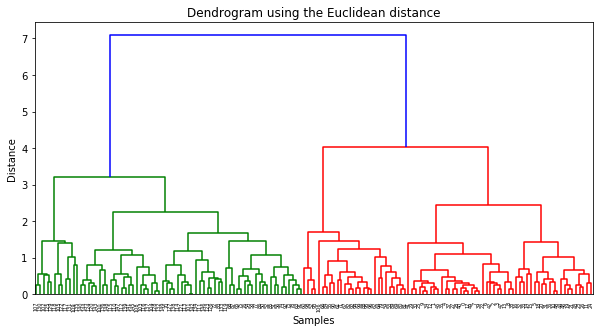

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram
linkage_matrix = linkage(X, method='complete', metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram using the Euclidean distance')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

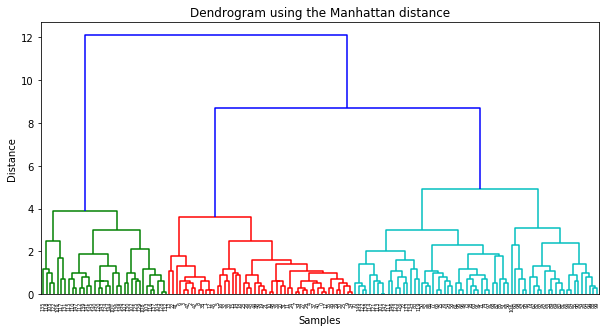

In [19]:


# Plot the dendrogram
linkage_matrix = linkage(X, method='complete', metric='cityblock')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram using the Manhattan distance')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

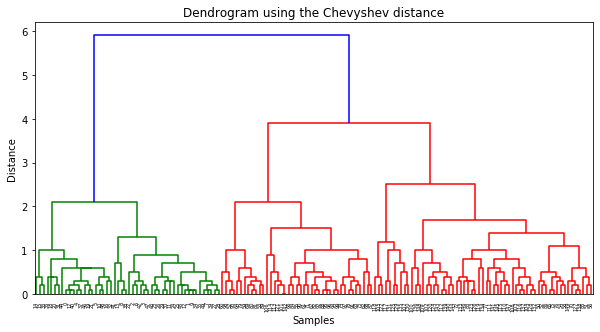

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram
linkage_matrix = linkage(X, method='complete', metric='chebyshev')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram using the Chevyshev distance')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

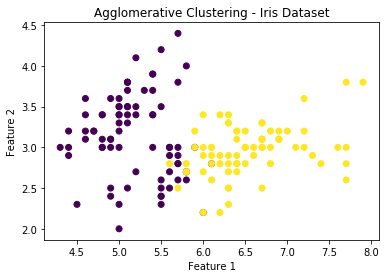

In [21]:
# Create a custom distance matrix
distances = np.array([[euclidean_distance(x, y) for x in X] for y in X])

# Perform agglomerative clustering
model = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=5)
model.fit(distances)
labels = model.labels_
n_clusters = len(set(labels))

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering - Iris Dataset')
plt.show()

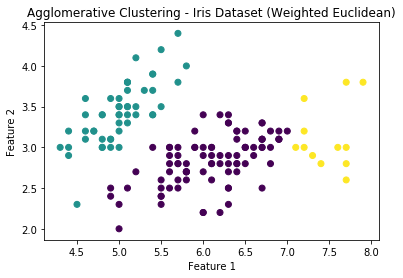

In [22]:
# Create a custom distance matrix using weighted Euclidean distance
distances = np.zeros((len(X), len(X)))
weights = [2, 1, 1, 1]  # Set the weights for the features
for i in range(len(X)):
    for j in range(len(X)):
        distances[i, j] = euclidean_distance_weighted(X[i], X[j], weights=weights)

# Perform agglomerative clustering
model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
model.fit(distances)
labels = model.labels_
n_clusters = len(set(labels))

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering - Iris Dataset (Weighted Euclidean)')
plt.show()


# Real-world application

## Problem definition

The objective of this project is to address a real-life problem in the retail industry by exploring a retail dataset using the K-means clustering algorithm. The analysis focuses on two key features: "frequency" and "revenue." The goal is to gain insights into customer segmentation based on purchasing behavior and identify potential loyal customers and high-value customers.

The analysis aims to investigate the impact of different distance metrics, including a custom distance metric, on the resulting clusters. By designing a custom distance metric that assigns more weight to either the "frequency" or "revenue" feature, we seek to highlight the influence of these factors on customer segmentation.

## Preprocessing the data

*Source: https://www.kaggle.com/datasets/vijayuv/onlineretail*

Each row in the dataset represents an individual item within a transaction, and multiple rows with the same "InvoiceNo" can be present to capture the different items purchased in a single transaction.

In [23]:
# Read data from csv

retail_data = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
# Remove missing values for CustomerID

retail_data = retail_data.dropna(subset=["CustomerID"])

In [25]:
# Check datatypes of columns to fix any if needed

retail_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [26]:
retail_data['CustomerID'] = retail_data['CustomerID'].astype(int).astype(str)

In [27]:
retail_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [28]:
# Country coverage of the data

retail_data["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [29]:
# Choose United Kingdom to conduct the analysis in only one country

retail_data = retail_data[retail_data["Country"] == "United Kingdom"].reset_index(drop=True)

In [30]:
len(retail_data)

361878

In [31]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [32]:
# Remove negative invoices as the scope of our analysis is positive purchase behavior 

retail_data = retail_data[retail_data["Quantity"]>=1]
len(retail_data)

354345

### Features to look at for the analysis: frequency and revenue

In [33]:
# Calculate the revenue for each invoice with revenue = quantity * price

retail_data["Revenue"] = retail_data["Quantity"] * retail_data["UnitPrice"]
retail_data_revenue = retail_data.groupby("CustomerID")["Revenue"].sum().reset_index()
retail_data_revenue

,CustomerID,Revenue
0,12346,77183.60
1,12747,4196.01
2,12748,33719.73
3,12749,4090.88
4,12820,942.34
...,...,...
3916,18280,180.60
3917,18281,80.82
3918,18282,178.05
3919,18283,2094.88


In [34]:
retail_data_frequency = retail_data.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
retail_data_frequency.columns = ["CustomerID", "Frequency"]
retail_data_frequency

,CustomerID,Frequency
0,12346,1
1,12747,11
2,12748,210
3,12749,5
4,12820,4
...,...,...
3916,18280,1
3917,18281,1
3918,18282,2
3919,18283,16


In [35]:
# Check for missing values in the data

missing_values = retail_data_frequency.isnull().sum()

retail_data_frequency = retail_data_frequency.dropna()

missing_values = retail_data_frequency.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID    0
Frequency     0
dtype: int64


In [36]:
#add this data to our main dataframe
features = pd.merge(retail_data_revenue, retail_data_frequency, on = "CustomerID")

features

,CustomerID,Revenue,Frequency
0,12346,77183.60,1
1,12747,4196.01,11
2,12748,33719.73,210
3,12749,4090.88,5
4,12820,942.34,4
...,...,...,...
3916,18280,180.60,1
3917,18281,80.82,1
3918,18282,178.05,2
3919,18283,2094.88,16


In [37]:
features

,CustomerID,Revenue,Frequency
0,12346,77183.60,1
1,12747,4196.01,11
2,12748,33719.73,210
3,12749,4090.88,5
4,12820,942.34,4
...,...,...,...
3916,18280,180.60,1
3917,18281,80.82,1
3918,18282,178.05,2
3919,18283,2094.88,16


## Try the elbow method on the frequency feature

In [38]:
# Investigate the data to analyse

features = features[["Revenue", "Frequency"]]
print(features.head())
print(features.dtypes)
features.describe()

    Revenue  Frequency
0  77183.60          1
1   4196.01         11
2  33719.73        210
3   4090.88          5
4    942.34          4
Revenue      float64
Frequency      int64
dtype: object


,Revenue,Frequency
count,3921.000000,3921.000000
mean,1863.910113,4.246111
std,7481.922217,7.205750
min,0.000000,1.000000
25%,300.040000,1.000000
50%,651.820000,2.000000
75%,1575.890000,5.000000
max,259657.300000,210.000000


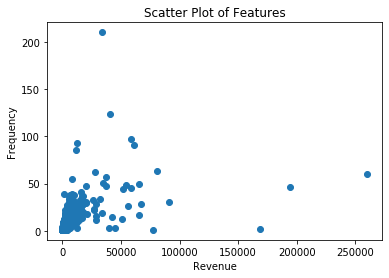

In [39]:
# Select the two features for scatter plot
x_feature = "Revenue"
y_feature = "Frequency"

# Create scatter plot
plt.scatter(features[x_feature], features[y_feature])
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot of Features")
plt.show()

In [40]:
# Filter the dataframe to remove outliers

features = features[(features["Frequency"] <130) & (features["Revenue"] < 10000)].reset_index(drop=True)

features

,Revenue,Frequency
0,4196.01,11
1,4090.88,5
2,942.34,4
3,92.72,1
4,948.88,2
...,...,...
3831,180.60,1
3832,80.82,1
3833,178.05,2
3834,2094.88,16


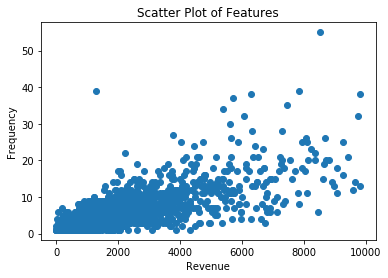

In [41]:
# Select the two features for scatter plot
x_feature = "Revenue"
y_feature = "Frequency"

# Create scatter plot
plt.scatter(features[x_feature], features[y_feature])
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot of Features")
plt.show()

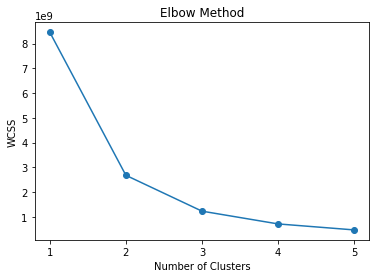

In [42]:
kmeans_clustering_elbow_method(features.values, manhattan_distance, max_clusters = 5)

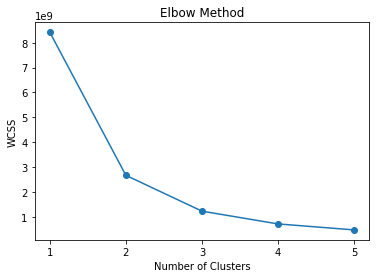

In [43]:
kmeans_clustering_elbow_method(features.values, euclidean_distance, max_clusters = 5)

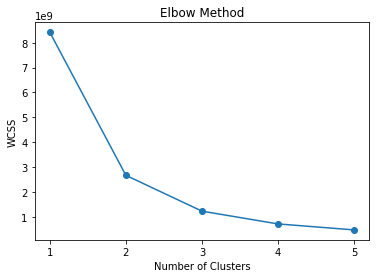

In [44]:
kmeans_clustering_elbow_method(features.values, chebyshev_distance, max_clusters = 5)

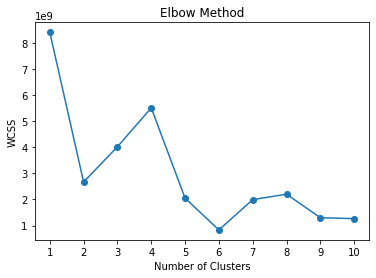

In [45]:
kmeans_clustering_elbow_method(features.values, distance_metric = euclidean_distance_weighted, weights_distance=[1,2])

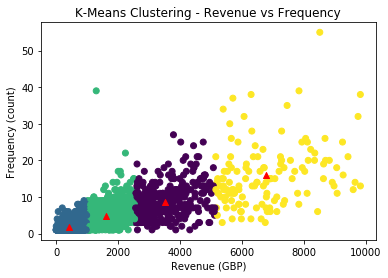

In [46]:
# Set the optimal number of clusters to 4
n_clusters = 4

# Perform k-means clustering
labels, centroids = kmeans(features.values, n_clusters, distance_metric=euclidean_distance)

# Plot the data points with their assigned clusters
plt.scatter(features.values[:, 0], features.values[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red')

plt.xlabel('Revenue (GBP)')
plt.ylabel('Frequency (count)')
plt.title('K-Means Clustering - Revenue vs Frequency')

plt.show()


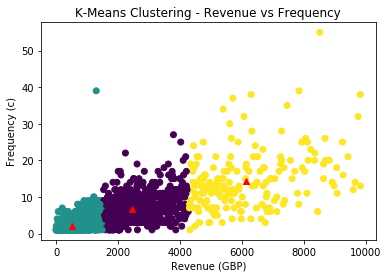

In [47]:
# Set the optimal number of clusters to 4
n_clusters = 3

# Perform k-means clustering
labels, centroids = kmeans(features.values, n_clusters, distance_metric=euclidean_distance)

# Plot the data points with their assigned clusters
plt.scatter(features.values[:, 0], features.values[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red')

plt.xlabel('Revenue (GBP)')
plt.ylabel('Frequency (c)')
plt.title('K-Means Clustering - Revenue vs Frequency')

plt.show()



Let's try assigning higher value to the revenue with the custom distance metric weights

Assigning higher weight to revenue in the custom distance metric is justified to prioritize customers who contribute more to the company's revenue, identify high-value customers, and maximize profitability. By emphasizing revenue, businesses can target customers with higher purchasing power and focus on strategies that drive revenue growth. This approach helps align clustering analysis with the business's financial objectives and the importance of revenue generation.

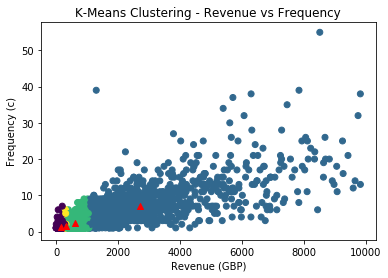

In [48]:
# Set the optimal number of clusters to 4
n_clusters = 4

# Perform k-means clustering
labels, centroids = kmeans(features.values, n_clusters, distance_metric=euclidean_distance_weighted, weights=[2,1])

# Plot the data points with their assigned clusters
plt.scatter(features.values[:, 0], features.values[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red')

plt.xlabel('Revenue (GBP)')
plt.ylabel('Frequency (c)')
plt.title('K-Means Clustering - Revenue vs Frequency')

plt.show()

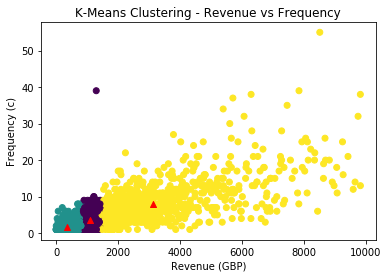

In [49]:
# Set the optimal number of clusters to 3
n_clusters = 3

# Perform k-means clustering
labels, centroids = kmeans(features.values, n_clusters, distance_metric=euclidean_distance_weighted, weights=[2,1])

# Plot the data points with their assigned clusters
plt.scatter(features.values[:, 0], features.values[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red')

plt.xlabel('Revenue (GBP)')
plt.ylabel('Frequency (c)')
plt.title('K-Means Clustering - Revenue vs Frequency')

plt.show()

Check customers for loyalty not money spent

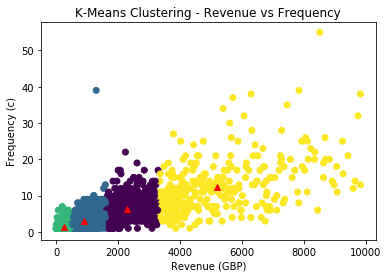

In [50]:
# Set the optimal number of clusters to 4
n_clusters = 4

# Perform k-means clustering
labels, centroids = kmeans(features.values, n_clusters, distance_metric=euclidean_distance_weighted, weights=[1,2])

# Plot the data points with their assigned clusters
plt.scatter(features.values[:, 0], features.values[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red')

plt.xlabel('Revenue (GBP)')
plt.ylabel('Frequency (c)')
plt.title('K-Means Clustering - Revenue vs Frequency')

plt.show()

## Conclusion and Summary

Customizing cluster interpretation: By assigning weights, you can influence the interpretation of the resulting clusters. For example, if revenue is given a higher weight, the clusters formed may represent distinct customer segments based on their purchasing power. Conversely, if frequency is given more weight, the clusters may capture groups of customers with different levels of engagement or loyalty.

Adaptation to business requirements: Weighting features allows you to tailor the clustering analysis to specific business requirements. For instance, if your goal is to identify high-value customers, you can assign a higher weight to revenue. On the other hand, if your objective is to identify frequent buyers, you can assign a higher weight to frequency.

**Some bullet points:**

The custom distance metric, with higher weight assigned to revenue, provided valuable insights into customer segmentation in the retail dataset.
By emphasizing revenue in the clustering analysis, we were able to identify high-value customers, maximize profitability, and target customers with higher purchasing power.
The results highlighted the importance of considering revenue alongside other factors, such as frequency, in customer segmentation strategies, as it enabled a more comprehensive understanding of customer behavior and preferences.
The custom distance metric approach showcased the flexibility and adaptability of clustering algorithms to address real-life business problems and align with specific objectives, such as revenue optimization.
Future research could explore additional features and evaluate the impact of different weight distributions in the custom distance metric to further refine customer segmentation and gain deeper insights into customer behavior and value.